In [68]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import numpy as np
import requests
import json
from doe_api import doe_key

In [2]:
#Academics
url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json'
params = {
    'api_key': doe_key,
    'per_page': 150,
    'fields': 'id,'+
    'location.lon,'+
    'location.lat,'+
    'latest.school.name,'+
    'latest.aid.federal_loan_rate,'+
    'latest.cost.title_iv.private.all,'+
    'latest.academics.program_reporter.programs_offered,'+
    'latest.school.tuition_revenue_per_fte,'+
    'latest.student.enrollment.all,'+
    'latest.school.degrees_awarded.highest,'+
    'latest.admissions.sat_scores.midpoint.writing,'+
    'latest.admissions.sat_scores.midpoint.math,'+
    'latest.admissions.sat_scores.midpoint.critical_reading,'+
    'latest.admissions.sat_scores.average.overall,'+
    'latest.admissions.act_scores.midpoint.writing,'+
    'latest.admissions.act_scores.midpoint.math,'+
    'latest.admissions.act_scores.midpoint.english,'+
    #'latest.admissions.act_scores.midpoint.cumulative'+
    'latest.student.retention_rate.four_year.part_time_pooled,'+
    #'latest.student.retention_rate.four_year.full_time_pooled,'+
    #'latest.school.ownership'+
    #'latest.completion.completion_rate_less_than_4yr_150nt,'+
    'latest.completion.completion_rate_4yr_150_white,'+
    'latest.completion.completion_rate_4yr_150_2ormore,'+
    'latest.completion.completion_rate_4yr_150_nhpi,'+
    'latest.completion.completion_rate_4yr_150_hispanic,'+
    'latest.completion.completion_rate_4yr_150_black,'+
    'latest.completion.completion_rate_4yr_150_asian,'+
    'latest.completion.completion_rate_4yr_150_aian,'+
    #'latest.completion.completion_rate_4yr_150nt'+
    
    'page=0'
}

In [3]:
#Initialize an empty list to store the data
academics_data = []
#starting page is 0
params['page'] = 0

#loop that will loop through the page until we reach page 6
while params['page'] < 7:
    #api call
    response = requests.get(url, params=params).json()
    next_page_results = response.get("results", [])
    academics_data.extend(next_page_results)
    #to go to the next page of results
    params['page'] += 1


academics_df = pd.DataFrame(academics_data)
academics_df = academics_df.fillna(0)

In [4]:
academics_df

,latest.school.name,latest.aid.federal_loan_rate,latest.cost.title_iv.private.all,latest.academics.program_reporter.programs_offered,latest.school.tuition_revenue_per_fte,latest.student.enrollment.all,latest.school.degrees_awarded.highest,latest.admissions.sat_scores.midpoint.writing,latest.admissions.sat_scores.midpoint.math,latest.admissions.sat_scores.midpoint.critical_reading,...,latest.completion.completion_rate_4yr_150_white,latest.completion.completion_rate_4yr_150_2ormore,latest.completion.completion_rate_4yr_150_nhpi,latest.completion.completion_rate_4yr_150_hispanic,latest.completion.completion_rate_4yr_150_black,latest.completion.completion_rate_4yr_150_asian,latest.completion.completion_rate_4yr_150_aian,id,location.lat,location.lon
0,Alabama A & M University,0.6552,0.0,0.0,9243.0,0,4,414.0,460.0,475.0,...,0.3043,0.3214,0.0000,0.2222,0.2805,0.0000,0.0000,100654,34.783368,-86.568502
1,University of Alabama at Birmingham,0.4401,0.0,0.0,11678.0,0,4,0.0,644.0,637.0,...,0.6276,0.5000,0.0000,0.5769,0.5565,0.8354,0.6000,100663,33.505697,-86.799345
2,Amridge University,0.8423,0.0,0.0,14093.0,0,4,0.0,0.0,0.0,...,1.0000,0.0000,0.0000,0.0000,0.2857,0.0000,0.0000,100690,32.362609,-86.174010
3,University of Alabama in Huntsville,0.3578,0.0,0.0,8246.0,0,4,0.0,655.0,640.0,...,0.6098,0.6000,0.0000,0.6444,0.4845,0.8125,0.6667,100706,34.724557,-86.640449
4,Alabama State University,0.7637,0.0,0.0,8535.0,0,4,0.0,457.0,488.0,...,0.3636,0.0625,0.0000,0.4286,0.2844,0.3333,0.0000,100724,32.364317,-86.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Robert Morgan Educational Center and Technical...,0.0000,0.0,20.0,1479.0,0,1,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,136826,25.599247,-80.390054
696,Rollins College,0.3022,242.0,0.0,20478.0,0,4,0.0,0.0,0.0,...,0.7210,0.6000,0.0000,0.6667,0.8571,0.6000,0.5000,136950,28.592787,-81.349239
697,First Coast Technical College,0.0000,0.0,17.0,4315.0,0,1,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,137023,29.924377,-81.345829
698,Saint Leo University,0.4543,527.0,0.0,11729.0,0,4,0.0,510.0,530.0,...,0.4637,0.4211,0.0000,0.4397,0.4301,0.7500,0.0000,137032,28.336776,-82.257801


In [5]:
Data_clean = academics_df.rename(columns={
'latest.school.name' : 'School Name',
'latest.cost.title_iv.private.all' : 'Title 4 Cost Private',
'latest.academics.program_reporter.programs_offered' : 'No.of programs offered',
'latest.school.tuition_revenue_per_fte' : 'Tuition FT Enrollment in $',
'latest.student.enrollment.all': 'Enrollment',
'latest.school.degrees_awarded.highest' : 'Highest degree awarded',
'latest.admissions.sat_scores.midpoint.writing' : 'SAT Writing Midpoint',
'latest.admissions.sat_scores.midpoint.math' : 'SAT Math Midpoint',
'latest.admissions.sat_scores.midpoint.critical_reading' : 'SAT Critical Reading Midpoint',
'latest.admissions.sat_scores.average.overall' : 'SAT Average Overall',
'latest.admissions.act_scores.midpoint.writing' : 'ACT Writing Midpoint',
'latest.admissions.act_scores.midpoint.math' : ' ACT Math Midpoint',
'latest.admissions.act_scores.midpoint.english' : 'ACT English Midpoint',
'latest.student.retention_rate.four_year.part_time_pooled' : 'Retention Rate FT',
'latest.completion.completion_rate_4yr_150_white' : 'Completion Rate 4 year (White)',
'latest.completion.completion_rate_4yr_150_2ormore' : 'Completion Rate 4 year (2 Or More Races)',
'latest.completion.completion_rate_4yr_150_nhpi':'Completion Rate 4 year (Hawaian/Pacific Islander)',
'latest.completion.completion_rate_4yr_150_hispanic':'Completion Rate 4 year (Hispanic)',
'latest.completion.completion_rate_4yr_150_black' : 'Completion Rate 4 year (Black)',
'latest.completion.completion_rate_4yr_150_asian' : 'Completion Rate 4 year (Asian)',
'latest.completion.completion_rate_4yr_150_aian' : 'Completion Rate 4 year (American Indian)',
'latest.completion.completion_rate_4yr_150nt_pooled': 'General Completion Rate',
'latest.aid.federal_loan_rate' : '% of Students receiving Federal Loan',
'location.lon' : 'Longitutde',
'location.lat': 'latitude'
})

In [6]:
Data_clean.columns

Index(['School Name', '% of Students receiving Federal Loan',
       'Title 4 Cost Private', 'No.of programs offered',
       'Tuition FT Enrollment in $', 'Enrollment', 'Highest degree awarded',
       'SAT Writing Midpoint', 'SAT Math Midpoint',
       'SAT Critical Reading Midpoint', 'SAT Average Overall',
       'ACT Writing Midpoint', ' ACT Math Midpoint', 'ACT English Midpoint',
       'Retention Rate FT', 'Completion Rate 4 year (White)',
       'Completion Rate 4 year (2 Or More Races)',
       'Completion Rate 4 year (Hawaian/Pacific Islander)',
       'Completion Rate 4 year (Hispanic)', 'Completion Rate 4 year (Black)',
       'Completion Rate 4 year (Asian)',
       'Completion Rate 4 year (American Indian)', 'id', 'latitude',
       'Longitutde'],
      dtype='object')

In [7]:
Data_clean['Completion Rate 4 year (White)'] = Data_clean['Completion Rate 4 year (White)'] * 100
Data_clean['Retention Rate FT'] = Data_clean['Retention Rate FT'] * 100
Data_clean['Completion Rate 4 year (2 Or More Races)'] = Data_clean['Completion Rate 4 year (2 Or More Races)'] * 100
Data_clean['Completion Rate 4 year (Hawaian/Pacific Islander)'] = Data_clean['Completion Rate 4 year (Hawaian/Pacific Islander)'] * 100
Data_clean['Completion Rate 4 year (Hispanic)'] = Data_clean['Completion Rate 4 year (Hispanic)'] * 100
Data_clean['Completion Rate 4 year (Asian)'] = Data_clean['Completion Rate 4 year (Asian)'] * 100
Data_clean['Completion Rate 4 year (American Indian)'] = Data_clean['Completion Rate 4 year (American Indian)'] * 100
Data_clean['Completion Rate 4 year (Black)'] = Data_clean['Completion Rate 4 year (Black)'] * 100
Data_clean['% of Students receiving Federal Loan'] = Data_clean['% of Students receiving Federal Loan'] * 100

In [8]:
Data_clean['Retention Rate FT']

0      56.00
1      54.26
2       0.00
3      16.28
4      16.92
       ...  
695     0.00
696     0.00
697     0.00
698    69.23
699     0.00
Name: Retention Rate FT, Length: 700, dtype: float64

In [9]:
Data_clean = Data_clean.fillna(0)

In [10]:
Data_clean = Data_clean.drop_duplicates(subset='School Name')

In [11]:
Data_clean = Data_clean.set_index('School Name')

In [12]:
#By Income

url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json'
params2 = {
    'api_key': doe_key,
    'per_page': 150,
    'fields': "id,location.lon,"+
    "location.lat,latest.school.name,"+
    
    #median income
    "latest.student.demographics.median_family_income,"+
    "latest.student.demographics.median_hh_income"+
    
    #low income
    #general completion
    #"latest.completion.title_iv.low_inc.completed_by.2yrs,"+
    "latest.completion.title_iv.low_inc.completed_by.3yrs,"+
    "latest.completion.title_iv.low_inc.completed_by.4yrs,"+
    "latest.completion.title_iv.low_inc.completed_by.6yrs,"+
    "latest.completion.title_iv.low_inc.completed_by.8yrs,"+
    
    #general withdrew
    "latest.completion.title_iv.low_inc.withdrawn_by.2yrs,"+
    "latest.completion.title_iv.low_inc.withdrawn_by.3yrs,"+
    "latest.completion.title_iv.low_inc.withdrawn_by.4yrs,"+
    "latest.completion.title_iv.low_inc.withdrawn_by.6yrs,"+
    "latest.completion.title_iv.low_inc.withdrawn_by.8yrs,"+
    
    #transferred and withdrew
    #"latest.completion.title_iv.low_inc.transf_withdrawn_4yr_by.2yrs,latest.completion.title_iv.low_inc.transf_withdrawn_4yr_by.3yrs,"+
    #"latest.completion.title_iv.low_inc.transf_withdrawn_4yr_by.4yrs,latest.completion.title_iv.low_inc.transf_withdrawn_4yr_by.6yrs,"+
    #"latest.completion.title_iv.low_inc.transf_withdrawn_4yr_by.8yrs,"+
    
    #transferred and completed
    #"latest.completion.title_iv.low_inc.transf_completed_4yr_by.2yrs,latest.completion.title_iv.low_inc.transf_completed_4yr_by.3yrs,"+
    #"latest.completion.title_iv.low_inc.transf_completed_4yr_by.4yrs,latest.completion.title_iv.low_inc.transf_completed_4yr_by.6yrs,"+
    #"latest.completion.title_iv.low_inc.transf_completed_4yr_by.8yrs,"+
    
    #middle income
    #general completion
    #"latest.completion.title_iv.mid_inc.completed_by.2yrs,"+
    "latest.completion.title_iv.mid_inc.completed_by.3yrs,"+
    "latest.completion.title_iv.mid_inc.completed_by.4yrs,"+
    "latest.completion.title_iv.mid_inc.completed_by.6yrs,"+
    "latest.completion.title_iv.mid_inc.completed_by.8yrs,"+
    
    #general withdrew
    "latest.completion.title_iv.mid_inc.withdrawn_by.2yrs,"+
    "latest.completion.title_iv.mid_inc.withdrawn_by.3yrs,"+
    "latest.completion.title_iv.mid_inc.withdrawn_by.4yrs,"+
    "latest.completion.title_iv.mid_inc.withdrawn_by.6yrs,"+
    "latest.completion.title_iv.mid_inc.withdrawn_by.8yrs,"+
    
    #transferred and withdrew
    #"latest.completion.title_iv.mid_inc.transf_withdrawn_4yr_by.2yrs,latest.completion.title_iv.mid_inc.transf_withdrawn_4yr_by.3yrs,"+
    #"latest.completion.title_iv.mid_inc.transf_withdrawn_4yr_by.4yrs,latest.completion.title_iv.mid_inc.transf_withdrawn_4yr_by.6yrs,"+
    #"latest.completion.title_iv.mid_inc.transf_withdrawn_4yr_by.8yrs,"+
    
    #transferred and completed
    #"latest.completion.title_iv.mid_inc.transf_completed_4yr_by.2yrs,latest.completion.title_iv.mid_inc.transf_completed_4yr_by.3yrs,"+
    #"latest.completion.title_iv.mid_inc.transf_completed_4yr_by.4yrs,latest.completion.title_iv.mid_inc.transf_completed_4yr_by.6yrs,"+
    #"latest.completion.title_iv.mid_inc.transf_completed_4yr_by.8yrs,"+
    
    #high income
    #general completion
    #"latest.completion.title_iv.high_inc.completed_by.2yrs,"+
    "latest.completion.title_iv.high_inc.completed_by.3yrs,"+
    "latest.completion.title_iv.high_inc.completed_by.4yrs,"+
    "latest.completion.title_iv.high_inc.completed_by.6yrs,"+
    "latest.completion.title_iv.high_inc.completed_by.8yrs,"+
    
    #general withdrew
    "latest.completion.title_iv.high_inc.withdrawn_by.2yrs,"+
    "latest.completion.title_iv.high_inc.withdrawn_by.3yrs,"+
    "latest.completion.title_iv.high_inc.withdrawn_by.4yrs,"+
    "latest.completion.title_iv.high_inc.withdrawn_by.6yrs,"+
    "latest.completion.title_iv.high_inc.withdrawn_by.8yrs,"+
    
    #transferred and withdrew
    #"latest.completion.title_iv.high_inc.transf_withdrawn_4yr_by.2yrs,latest.completion.title_iv.high_inc.transf_withdrawn_4yr_by.3yrs,"+
    #"latest.completion.title_iv.high_inc.transf_withdrawn_4yr_by.4yrs,latest.completion.title_iv.high_inc.transf_withdrawn_4yr_by.6yrs,"+
    #"latest.completion.title_iv.high_inc.transf_withdrawn_4yr_by.8yrs,"+
    
    #transferred and completed
    #"latest.completion.title_iv.high_inc.transf_completed_4yr_by.2yrs,latest.completion.title_iv.high_inc.transf_completed_4yr_by.3yrs,"+
    #"latest.completion.title_iv.high_inc.transf_completed_4yr_by.4yrs,latest.completion.title_iv.high_inc.transf_completed_4yr_by.6yrs,"+
    #"latest.completion.title_iv.high_inc.transf_completed_4yr_by.8yrs"+
    
    #page marker
    'page=0'
    
    
}

In [13]:
# Initialize an empty list to store the data
income_data = []
#starting page is 0
params2['page'] = 0

#loop that will loop through the page until we reach page 6
while params2['page'] < 7:
    #api call
    response = requests.get(url, params=params2).json()
    next_page_results = response.get("results", [])
    income_data.extend(next_page_results)
    #to go to the next page of results
    params2['page'] += 1

In [14]:
income_df = pd.DataFrame(income_data)
income_df = income_df.fillna(0)

In [15]:
income_df.columns

Index(['latest.school.name',
       'latest.student.demographics.median_family_income',
       'latest.completion.title_iv.low_inc.completed_by.4yrs',
       'latest.completion.title_iv.low_inc.completed_by.6yrs',
       'latest.completion.title_iv.low_inc.completed_by.8yrs',
       'latest.completion.title_iv.low_inc.withdrawn_by.2yrs',
       'latest.completion.title_iv.low_inc.withdrawn_by.3yrs',
       'latest.completion.title_iv.low_inc.withdrawn_by.4yrs',
       'latest.completion.title_iv.low_inc.withdrawn_by.6yrs',
       'latest.completion.title_iv.low_inc.withdrawn_by.8yrs',
       'latest.completion.title_iv.mid_inc.completed_by.3yrs',
       'latest.completion.title_iv.mid_inc.completed_by.4yrs',
       'latest.completion.title_iv.mid_inc.completed_by.6yrs',
       'latest.completion.title_iv.mid_inc.completed_by.8yrs',
       'latest.completion.title_iv.mid_inc.withdrawn_by.2yrs',
       'latest.completion.title_iv.mid_inc.withdrawn_by.3yrs',
       'latest.completion.titl

In [16]:
income_clean = income_df.rename(columns={
    'latest.school.name':'School Name',
    'latest.student.demographics.median_family_income':'Median Family Income',
    #'latest.completion.title_iv.low_inc.completed_by.3yrs':'Percent of Low Income that completed within 3 years',
    'latest.completion.title_iv.low_inc.completed_by.4yrs': '% of Low Income that completed within 4 years',
    'latest.completion.title_iv.low_inc.completed_by.6yrs': '% of Low Income that completed within 6 years',
    'latest.completion.title_iv.low_inc.completed_by.8yrs': '% of Low Income that completed within 8 years',
    'latest.completion.title_iv.low_inc.withdrawn_by.2yrs': '% of Low Income that withdrew within 2 years',
    'latest.completion.title_iv.low_inc.withdrawn_by.3yrs': '% of Low Income that withdrew within 3 years',
    'latest.completion.title_iv.low_inc.withdrawn_by.4yrs': '% of Low Income that withdrew within 4 years',
    'latest.completion.title_iv.low_inc.withdrawn_by.6yrs': '% of Low Income that withdrew within 6 years',
    'latest.completion.title_iv.low_inc.withdrawn_by.8yrs':'% of Low Income that withdrew within 8 years',
    'latest.completion.title_iv.mid_inc.completed_by.3yrs': '% of Middle Income that completed within 3 years',
    'latest.completion.title_iv.mid_inc.completed_by.4yrs': '% of Middle Income that completed within 4 years',
    'latest.completion.title_iv.mid_inc.completed_by.6yrs': '% of Middle Income that completed within 6 years',
    'latest.completion.title_iv.mid_inc.completed_by.8yrs': '% of Middle Income that completed within 8 years',
    'latest.completion.title_iv.mid_inc.withdrawn_by.2yrs': '% of Middle Income that withdrew within 2 years',
    'latest.completion.title_iv.mid_inc.withdrawn_by.3yrs': '% of Middle Income that withdrew within 3 years',
    'latest.completion.title_iv.mid_inc.withdrawn_by.4yrs': '% of Middle Income that withdrew within 4 years',
    'latest.completion.title_iv.mid_inc.withdrawn_by.6yrs': '% of Middle Income that withdrew within 6 years',
    'latest.completion.title_iv.mid_inc.withdrawn_by.8yrs': '% of Middle Income that withdrew within 8 years',
    'latest.completion.title_iv.high_inc.completed_by.3yrs':'% of High Income that completed 3 years',
    'latest.completion.title_iv.high_inc.completed_by.4yrs':'% of High Income that completed 4 years',
    'latest.completion.title_iv.high_inc.completed_by.6yrs':'% of High Income that completed 6 years',
    'latest.completion.title_iv.high_inc.completed_by.8yrs':'% of High Income that completed 8 years',
    'latest.completion.title_iv.high_inc.withdrawn_by.2yrs':'% of High Income that withdrew within 2 years',
    'latest.completion.title_iv.high_inc.withdrawn_by.3yrs':'% of High Income that withdrew within 3 years',
    'latest.completion.title_iv.high_inc.withdrawn_by.4yrs':'% of High Income that withdrew within 4 years',
    'latest.completion.title_iv.high_inc.withdrawn_by.6yrs':'% of High Income that withdrew within 6 years',
    'latest.completion.title_iv.high_inc.withdrawn_by.8yrs':'% of High Income that withdrew within 8 years',
    'location.lat': 'Latitude',
    'location.lon': 'Longitude'
    })

In [17]:
income_clean.columns

Index(['School Name', 'Median Family Income',
       '% of Low Income that completed within 4 years',
       '% of Low Income that completed within 6 years',
       '% of Low Income that completed within 8 years',
       '% of Low Income that withdrew within 2 years',
       '% of Low Income that withdrew within 3 years',
       '% of Low Income that withdrew within 4 years',
       '% of Low Income that withdrew within 6 years',
       '% of Low Income that withdrew within 8 years',
       '% of Middle Income that completed within 3 years',
       '% of Middle Income that completed within 4 years',
       '% of Middle Income that completed within 6 years',
       '% of Middle Income that completed within 8 years',
       '% of Middle Income that withdrew within 2 years',
       '% of Middle Income that withdrew within 3 years',
       '% of Middle Income that withdrew within 4 years',
       '% of Middle Income that withdrew within 6 years',
       '% of Middle Income that withdrew wi

In [18]:
income_clean

,School Name,Median Family Income,% of Low Income that completed within 4 years,% of Low Income that completed within 6 years,% of Low Income that completed within 8 years,% of Low Income that withdrew within 2 years,% of Low Income that withdrew within 3 years,% of Low Income that withdrew within 4 years,% of Low Income that withdrew within 6 years,% of Low Income that withdrew within 8 years,...,% of High Income that completed 6 years,% of High Income that completed 8 years,% of High Income that withdrew within 2 years,% of High Income that withdrew within 3 years,% of High Income that withdrew within 4 years,% of High Income that withdrew within 6 years,% of High Income that withdrew within 8 years,id,Latitude,Longitude
0,Alabama A & M University,23553.0,0.197746,0.283042,0.265734,0.348643,0.319361,0.381148,0.327930,0.285315,...,0.349515,0.330000,0.250000,0.186047,0.212329,0.242718,0.230000,100654,34.783368,-86.568502
1,University of Alabama at Birmingham,34489.0,0.440978,0.475979,0.477485,0.223259,0.247376,0.225126,0.208185,0.186916,...,0.626524,0.634064,0.151054,0.166464,0.176730,0.129573,0.123103,100663,33.505697,-86.799345
2,Amridge University,15033.0,0.000000,0.000000,0.104000,0.524823,0.532787,0.510638,0.508065,0.320000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100690,32.362609,-86.174010
3,University of Alabama in Huntsville,44787.0,0.332075,0.435547,0.448582,0.255198,0.230608,0.283019,0.218750,0.179078,...,0.545752,0.531915,0.163004,0.191450,0.276190,0.186275,0.138298,100706,34.724557,-86.640449
4,Alabama State University,22080.0,0.210593,0.297872,0.243494,0.352288,0.409938,0.345523,0.317447,0.293680,...,0.516340,0.420561,0.202247,0.203390,0.191304,0.150327,0.168224,100724,32.364317,-86.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Robert Morgan Educational Center and Technical...,16112.0,0.000000,0.283105,0.275542,0.467153,0.598485,0.558442,0.456621,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,136826,25.599247,-80.390054
696,Rollins College,43978.0,0.590361,0.701087,0.652174,0.115152,0.111111,0.132530,0.103261,0.126087,...,0.743421,0.802721,0.000000,0.000000,0.000000,0.092105,0.000000,136950,28.592787,-81.349239
697,First Coast Technical College,16017.0,0.461538,0.548000,0.470588,0.000000,0.292818,0.358974,0.248000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137023,29.924377,-81.345829
698,Saint Leo University,22361.0,0.224772,0.303931,0.346445,0.404938,0.342550,0.366183,0.269415,0.223223,...,0.564159,0.591029,0.177474,0.236152,0.181141,0.174779,0.176781,137032,28.336776,-82.257801


In [19]:
income_clean['% of Low Income that completed within 4 years'] = income_clean['% of Low Income that completed within 4 years'] * 100
income_clean['% of Low Income that completed within 6 years'] = income_clean['% of Low Income that completed within 6 years'] * 100
income_clean['% of Low Income that completed within 8 years'] = income_clean['% of Low Income that completed within 8 years'] * 100
income_clean['% of Low Income that withdrew within 2 years'] = income_clean['% of Low Income that withdrew within 2 years'] * 100
income_clean['% of Low Income that withdrew within 3 years'] = income_clean['% of Low Income that withdrew within 3 years'] * 100
income_clean['% of Low Income that withdrew within 4 years'] = income_clean['% of Low Income that withdrew within 4 years'] * 100
income_clean['% of Low Income that withdrew within 6 years'] = income_clean['% of Low Income that withdrew within 6 years'] * 100
income_clean['% of Low Income that withdrew within 8 years'] = income_clean['% of Low Income that withdrew within 8 years'] * 100
income_clean['% of Middle Income that completed within 3 years'] = income_clean["% of Middle Income that completed within 3 years"] * 100
income_clean['% of Middle Income that completed within 4 years'] = income_clean['% of Middle Income that completed within 4 years'] * 100
income_clean['% of Middle Income that completed within 6 years'] = income_clean['% of Middle Income that completed within 6 years'] * 100
income_clean['% of Middle Income that completed within 8 years'] = income_clean['% of Middle Income that completed within 8 years'] * 100
income_clean['% of Middle Income that withdrew within 2 years'] = income_clean['% of Middle Income that withdrew within 2 years'] * 100
income_clean['% of Middle Income that withdrew within 3 years'] = income_clean['% of Middle Income that withdrew within 3 years'] * 100
income_clean['% of Middle Income that withdrew within 4 years'] = income_clean['% of Middle Income that withdrew within 4 years'] * 100
income_clean['% of Middle Income that withdrew within 6 years'] = income_clean['% of Middle Income that withdrew within 6 years'] * 100
income_clean['% of Middle Income that withdrew within 8 years'] = income_clean['% of Middle Income that withdrew within 8 years'] * 100
income_clean['% of High Income that completed 3 years'] = income_clean['% of High Income that completed 3 years'] * 100
income_clean['% of High Income that completed 4 years'] = income_clean['% of High Income that completed 4 years'] * 100
income_clean['% of High Income that completed 6 years'] = income_clean['% of High Income that completed 6 years'] * 100
income_clean['% of High Income that completed 8 years'] = income_clean['% of High Income that completed 8 years'] * 100
income_clean['% of High Income that withdrew within 2 years'] = income_clean['% of High Income that withdrew within 2 years'] * 100
income_clean['% of High Income that withdrew within 3 years'] = income_clean['% of High Income that withdrew within 3 years'] * 100
income_clean['% of High Income that withdrew within 4 years'] = income_clean['% of High Income that withdrew within 4 years'] * 100
income_clean['% of High Income that withdrew within 6 years'] = income_clean['% of High Income that withdrew within 6 years'] * 100
income_clean['% of High Income that withdrew within 8 years'] = income_clean['% of High Income that withdrew within 8 years'] * 100


                                                                                


In [20]:
income_clean

,School Name,Median Family Income,% of Low Income that completed within 4 years,% of Low Income that completed within 6 years,% of Low Income that completed within 8 years,% of Low Income that withdrew within 2 years,% of Low Income that withdrew within 3 years,% of Low Income that withdrew within 4 years,% of Low Income that withdrew within 6 years,% of Low Income that withdrew within 8 years,...,% of High Income that completed 6 years,% of High Income that completed 8 years,% of High Income that withdrew within 2 years,% of High Income that withdrew within 3 years,% of High Income that withdrew within 4 years,% of High Income that withdrew within 6 years,% of High Income that withdrew within 8 years,id,Latitude,Longitude
0,Alabama A & M University,23553.0,19.774590,28.304239,26.573427,34.864301,31.936128,38.114754,32.793017,28.531469,...,34.951456,33.000000,25.000000,18.604651,21.232877,24.271845,23.000000,100654,34.783368,-86.568502
1,University of Alabama at Birmingham,34489.0,44.097808,47.597865,47.748513,22.325915,24.737631,22.512648,20.818505,18.691589,...,62.652439,63.406408,15.105386,16.646416,17.673049,12.957317,12.310287,100663,33.505697,-86.799345
2,Amridge University,15033.0,0.000000,0.000000,10.400000,52.482270,53.278689,51.063830,50.806452,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100690,32.362609,-86.174010
3,University of Alabama in Huntsville,44787.0,33.207547,43.554688,44.858156,25.519849,23.060797,28.301887,21.875000,17.907801,...,54.575163,53.191489,16.300366,19.144981,27.619048,18.627451,13.829787,100706,34.724557,-86.640449
4,Alabama State University,22080.0,21.059269,29.787234,24.349442,35.228849,40.993789,34.552333,31.744681,29.368030,...,51.633987,42.056075,20.224719,20.338983,19.130435,15.032680,16.822430,100724,32.364317,-86.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Robert Morgan Educational Center and Technical...,16112.0,0.000000,28.310502,27.554180,46.715328,59.848485,55.844156,45.662100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,136826,25.599247,-80.390054
696,Rollins College,43978.0,59.036145,70.108696,65.217391,11.515152,11.111111,13.253012,10.326087,12.608696,...,74.342105,80.272109,0.000000,0.000000,0.000000,9.210526,0.000000,136950,28.592787,-81.349239
697,First Coast Technical College,16017.0,46.153846,54.800000,47.058824,0.000000,29.281768,35.897436,24.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137023,29.924377,-81.345829
698,Saint Leo University,22361.0,22.477219,30.393097,34.644550,40.493827,34.254992,36.618292,26.941515,22.322275,...,56.415929,59.102902,17.747440,23.615160,18.114144,17.477876,17.678100,137032,28.336776,-82.257801


In [21]:
income_clean = income_clean
income_clean 

,School Name,Median Family Income,% of Low Income that completed within 4 years,% of Low Income that completed within 6 years,% of Low Income that completed within 8 years,% of Low Income that withdrew within 2 years,% of Low Income that withdrew within 3 years,% of Low Income that withdrew within 4 years,% of Low Income that withdrew within 6 years,% of Low Income that withdrew within 8 years,...,% of High Income that completed 6 years,% of High Income that completed 8 years,% of High Income that withdrew within 2 years,% of High Income that withdrew within 3 years,% of High Income that withdrew within 4 years,% of High Income that withdrew within 6 years,% of High Income that withdrew within 8 years,id,Latitude,Longitude
0,Alabama A & M University,23553.0,19.774590,28.304239,26.573427,34.864301,31.936128,38.114754,32.793017,28.531469,...,34.951456,33.000000,25.000000,18.604651,21.232877,24.271845,23.000000,100654,34.783368,-86.568502
1,University of Alabama at Birmingham,34489.0,44.097808,47.597865,47.748513,22.325915,24.737631,22.512648,20.818505,18.691589,...,62.652439,63.406408,15.105386,16.646416,17.673049,12.957317,12.310287,100663,33.505697,-86.799345
2,Amridge University,15033.0,0.000000,0.000000,10.400000,52.482270,53.278689,51.063830,50.806452,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100690,32.362609,-86.174010
3,University of Alabama in Huntsville,44787.0,33.207547,43.554688,44.858156,25.519849,23.060797,28.301887,21.875000,17.907801,...,54.575163,53.191489,16.300366,19.144981,27.619048,18.627451,13.829787,100706,34.724557,-86.640449
4,Alabama State University,22080.0,21.059269,29.787234,24.349442,35.228849,40.993789,34.552333,31.744681,29.368030,...,51.633987,42.056075,20.224719,20.338983,19.130435,15.032680,16.822430,100724,32.364317,-86.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Robert Morgan Educational Center and Technical...,16112.0,0.000000,28.310502,27.554180,46.715328,59.848485,55.844156,45.662100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,136826,25.599247,-80.390054
696,Rollins College,43978.0,59.036145,70.108696,65.217391,11.515152,11.111111,13.253012,10.326087,12.608696,...,74.342105,80.272109,0.000000,0.000000,0.000000,9.210526,0.000000,136950,28.592787,-81.349239
697,First Coast Technical College,16017.0,46.153846,54.800000,47.058824,0.000000,29.281768,35.897436,24.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137023,29.924377,-81.345829
698,Saint Leo University,22361.0,22.477219,30.393097,34.644550,40.493827,34.254992,36.618292,26.941515,22.322275,...,56.415929,59.102902,17.747440,23.615160,18.114144,17.477876,17.678100,137032,28.336776,-82.257801


In [22]:
income_clean = income_clean.set_index('School Name')

In [23]:
income_clean

,Median Family Income,% of Low Income that completed within 4 years,% of Low Income that completed within 6 years,% of Low Income that completed within 8 years,% of Low Income that withdrew within 2 years,% of Low Income that withdrew within 3 years,% of Low Income that withdrew within 4 years,% of Low Income that withdrew within 6 years,% of Low Income that withdrew within 8 years,% of Middle Income that completed within 3 years,...,% of High Income that completed 6 years,% of High Income that completed 8 years,% of High Income that withdrew within 2 years,% of High Income that withdrew within 3 years,% of High Income that withdrew within 4 years,% of High Income that withdrew within 6 years,% of High Income that withdrew within 8 years,id,Latitude,Longitude
School Name,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,23553.0,19.774590,28.304239,26.573427,34.864301,31.936128,38.114754,32.793017,28.531469,13.733075,...,34.951456,33.000000,25.000000,18.604651,21.232877,24.271845,23.000000,100654,34.783368,-86.568502
University of Alabama at Birmingham,34489.0,44.097808,47.597865,47.748513,22.325915,24.737631,22.512648,20.818505,18.691589,31.908549,...,62.652439,63.406408,15.105386,16.646416,17.673049,12.957317,12.310287,100663,33.505697,-86.799345
Amridge University,15033.0,0.000000,0.000000,10.400000,52.482270,53.278689,51.063830,50.806452,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100690,32.362609,-86.174010
University of Alabama in Huntsville,44787.0,33.207547,43.554688,44.858156,25.519849,23.060797,28.301887,21.875000,17.907801,30.693069,...,54.575163,53.191489,16.300366,19.144981,27.619048,18.627451,13.829787,100706,34.724557,-86.640449
Alabama State University,22080.0,21.059269,29.787234,24.349442,35.228849,40.993789,34.552333,31.744681,29.368030,16.666667,...,51.633987,42.056075,20.224719,20.338983,19.130435,15.032680,16.822430,100724,32.364317,-86.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Robert Morgan Educational Center and Technical College,16112.0,0.000000,28.310502,27.554180,46.715328,59.848485,55.844156,45.662100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,136826,25.599247,-80.390054
Rollins College,43978.0,59.036145,70.108696,65.217391,11.515152,11.111111,13.253012,10.326087,12.608696,59.027778,...,74.342105,80.272109,0.000000,0.000000,0.000000,9.210526,0.000000,136950,28.592787,-81.349239
First Coast Technical College,16017.0,46.153846,54.800000,47.058824,0.000000,29.281768,35.897436,24.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137023,29.924377,-81.345829


In [49]:
new_df = Data_clean["SAT Average Overall"]
new_df = new_df.drop(new_df[new_df.eq(0)].index)
new_df 

School Name
Alabama A & M University                954.0
University of Alabama at Birmingham    1266.0
University of Alabama in Huntsville    1300.0
Alabama State University                955.0
The University of Alabama              1244.0
                                        ...  
University of Miami                    1402.0
University of North Florida            1113.0
Nova Southeastern University           1187.0
Palm Beach Atlantic University         1139.0
Saint Leo University                   1063.0
Name: SAT Average Overall, Length: 119, dtype: float64

In [50]:
low_df = income_clean["% of Low Income that completed within 4 years"]
low_df = low_df.drop(low_df[low_df.eq(0)].index)
low_df 

School Name
Alabama A & M University               19.774590
University of Alabama at Birmingham    44.097808
University of Alabama in Huntsville    33.207547
Alabama State University               21.059269
The University of Alabama              48.023426
                                         ...    
Ringling College of Art and Design     69.387755
Rollins College                        59.036145
First Coast Technical College          46.153846
Saint Leo University                   22.477219
St Petersburg College                  22.378517
Name: % of Low Income that completed within 4 years, Length: 544, dtype: float64

In [59]:
low_df.drop(low_df.index[119:544], inplace=True)
low_df

School Name
Alabama A & M University                  19.774590
University of Alabama at Birmingham       44.097808
The University of Alabama                 48.023426
Central Alabama Community College         14.970060
Athens State University                   48.387097
                                            ...    
North Arkansas College                    35.359116
Northwest Technical Institute             68.478261
Ouachita Baptist University               46.808511
Arkansas State University Three Rivers    18.817204
University of the Ozarks                  30.666667
Name: % of Low Income that completed within 4 years, Length: 119, dtype: float64

In [63]:
high_df = income_clean["% of High Income that completed 4 years"]
high_df = high_df.drop(high_df[high_df.eq(0)].index)
high_df

School Name
Alabama A & M University               36.301370
University of Alabama at Birmingham    52.577320
University of Alabama in Huntsville    41.190476
Alabama State University               45.217391
The University of Alabama              64.744110
                                         ...    
Polk State College                     33.834586
Ringling College of Art and Design     84.693878
Rollins College                        65.986395
Saint Leo University                   48.635236
St Petersburg College                  37.176938
Name: % of High Income that completed 4 years, Length: 322, dtype: float64

In [65]:
high_df.drop(high_df.index[119:322], inplace=True)
high_df

School Name
Alabama A & M University                  36.301370
University of Alabama at Birmingham       52.577320
University of Alabama in Huntsville       41.190476
Alabama State University                  45.217391
The University of Alabama                 64.744110
                                            ...    
University of California-Irvine           82.564576
University of California-Los Angeles      84.580499
University of California-Riverside        74.364641
University of California-San Diego        84.812287
University of California-Santa Barbara    50.154162
Name: % of High Income that completed 4 years, Length: 119, dtype: float64

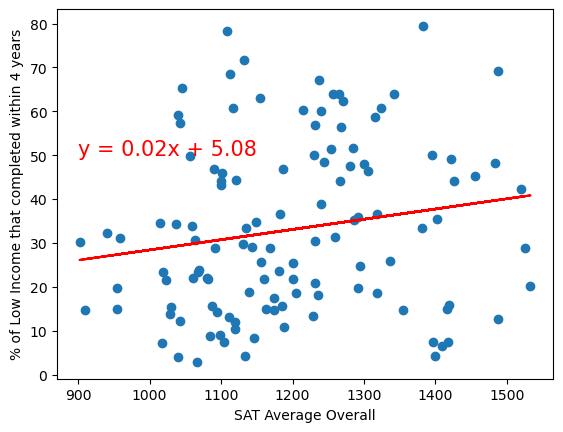

In [87]:
x_values = new_df.values 
y_values = low_df.values 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(900,50),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('% of Low Income that completed within 4 years')
plt.show()

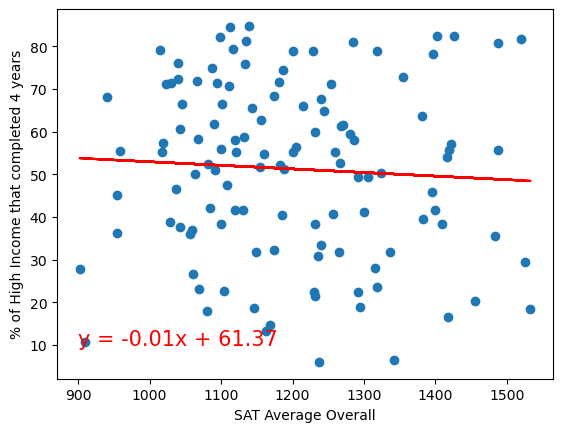

In [85]:
x_values = new_df
y_values = high_df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(900,10),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('% of High Income that completed 4 years')
plt.show()

In [79]:
new_df.values

array([ 954., 1266., 1300.,  955., 1244., 1069., 1214., 1042., 1111.,
       1030., 1017., 1146., 1131., 1236., 1132., 1019., 1082., 1080.,
       1169., 1230., 1240., 1043., 1119., 1163., 1188.,  902., 1149.,
       1133., 1059., 1183., 1084., 1286., 1231., 1061., 1100., 1094.,
       1117., 1228., 1200., 1318., 1174., 1487., 1160., 1100., 1533.,
       1028., 1023., 1354., 1395., 1422., 1237., 1090., 1265., 1342.,
       1256., 1520., 1231., 1305., 1418., 1456., 1098., 1295., 1484.,
       1284., 1318., 1232., 1040., 1156., 1292., 1399., 1205., 1324.,
       1057., 1088., 1037., 1104., 1174., 1046., 1382., 1143., 1040.,
       1067., 1416., 1337., 1315., 1185., 1200., 1109., 1409., 1292.,
       1426., 1526., 1260., 1381.,  941., 1419., 1488., 1181., 1015.,
        910., 1121.,  959., 1271., 1240., 1068., 1119., 1102., 1091.,
       1254., 1155., 1268., 1280., 1396., 1135., 1402., 1113., 1187.,
       1139., 1063.])